In [201]:
# /usr/bin/env python

import matplotlib.pyplot as plt
import subprocess
import os

In [246]:
output_filename = "spent_time.txt"
operations = ["./dot", "./nrm2", "./apply"]

In [252]:
def benchmark(tool_name='./dot'):
    # TODO Use an API to retrieve hardware-supported threads count
    thread_count = 8
    with open(output_filename, "w") as f:
        print("Using file: ", output_filename)
    
    for i in range(0, thread_count):
        with open(output_filename, "a+") as f:
            subprocess.Popen(tool_name + " --vecLen=1024", 
                             shell=True,
                             stdout=f,
                             env={'CHPL_RT_NUM_THREADS_PER_LOCALE': str(i+1)}).wait()

In [253]:
def read_benchmark_results():
    content = []
    with open(output_filename, "r") as f:
        content = f.read()
        
    thread_count = []
    time_spent = []
    current_thread = 1
    for line in content.split('\n'):
        thread_count.append(current_thread)
        current_thread += 1
        if len(line) != 0:
            time_spent.append(float(line))
        else:
            del thread_count[-1]

    return thread_count, time_spent
        

In [254]:
def visualize(thread_idx, time_spent_for_thread, idx):
    title = operations[idx]
    plt.grid()
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel("Thread Count")
    ax.set_ylabel("Time(s)")
    ax.plot(thread_idx, time_spent_for_thread)

Using file:  spent_time.txt
thread_count:  [1, 2, 3, 4, 5, 6, 7, 8]
time_spent:  [0.009171, 0.021461, 0.037413, 0.057697, 0.064993, 0.090189, 0.111023, 0.111966]
Using file:  spent_time.txt
thread_count:  [1, 2, 3, 4, 5, 6, 7, 8]
time_spent:  [0.005051, 0.022941, 0.038786, 0.054352, 0.064623, 0.084363, 0.130556, 0.131191]
Using file:  spent_time.txt
thread_count:  [1, 2, 3, 4, 5, 6, 7, 8]
time_spent:  [102.636, 53.9069, 46.1341, 41.541, 30.5278, 25.7688, 25.7774, 32.472]


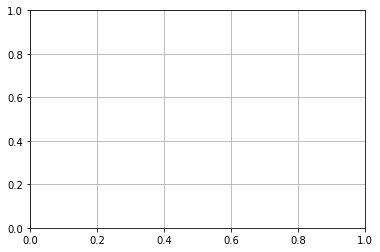

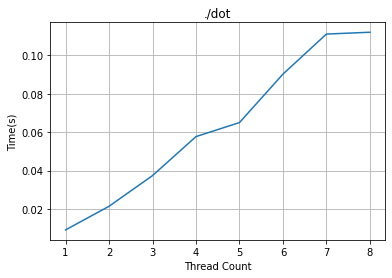

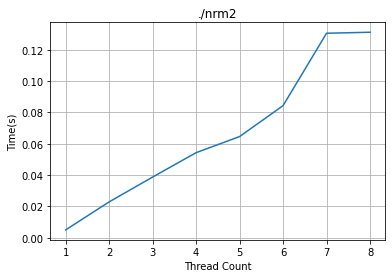

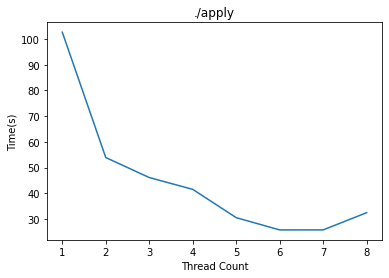

In [255]:
def main():
    for idx, operation in enumerate(operations):
        benchmark(operation)
        x, y = read_benchmark_results()
        print('thread_count: ', x)
        print('time_spent: ', y)
        visualize(x, y, idx)

main()